Utilisateur 1 :


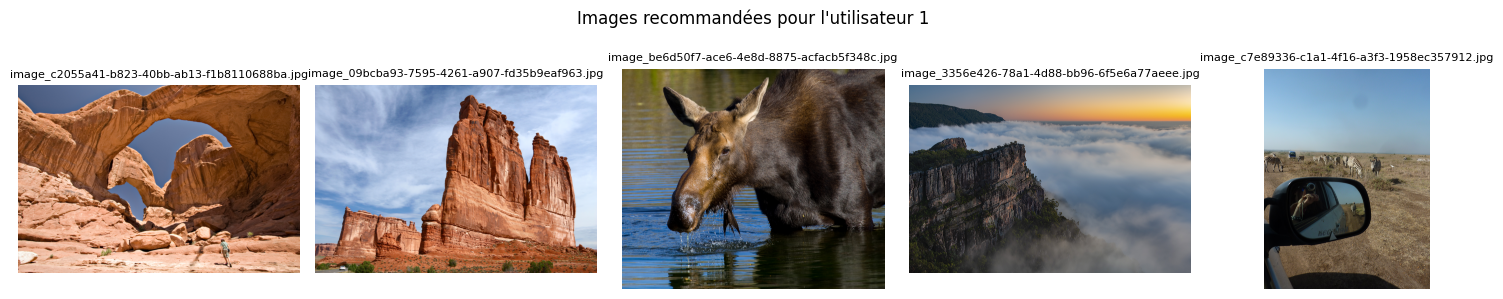

Utilisateur 2 :


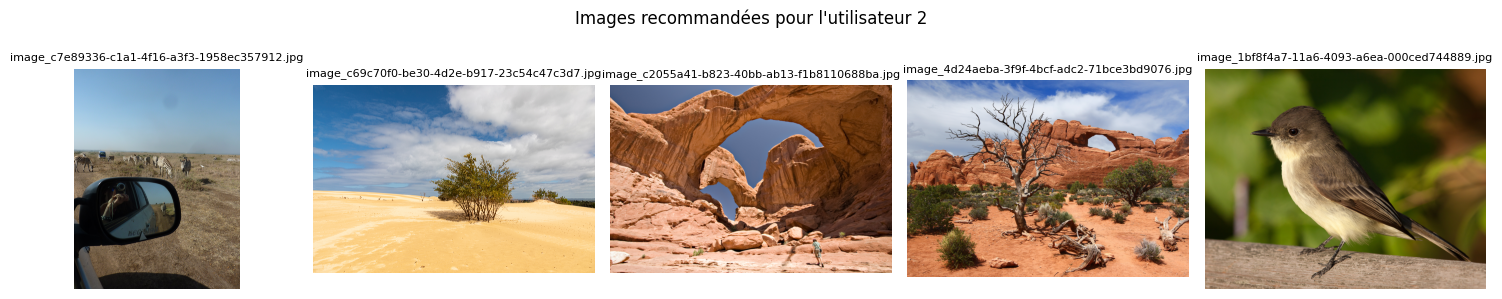

Utilisateur 3 :


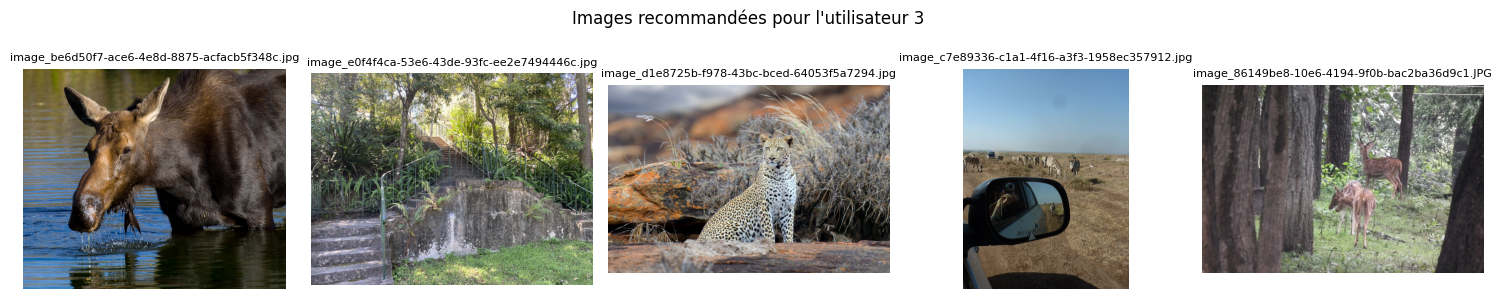

Utilisateur 4 :


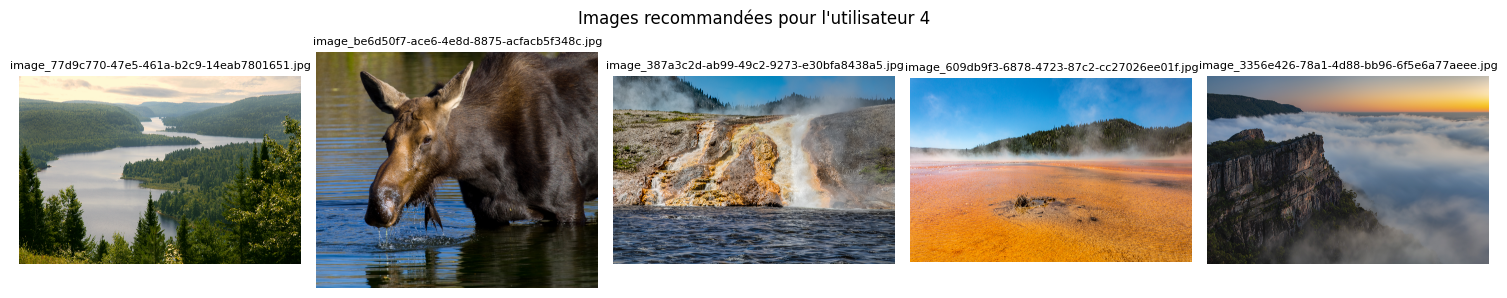

Utilisateur 5 :


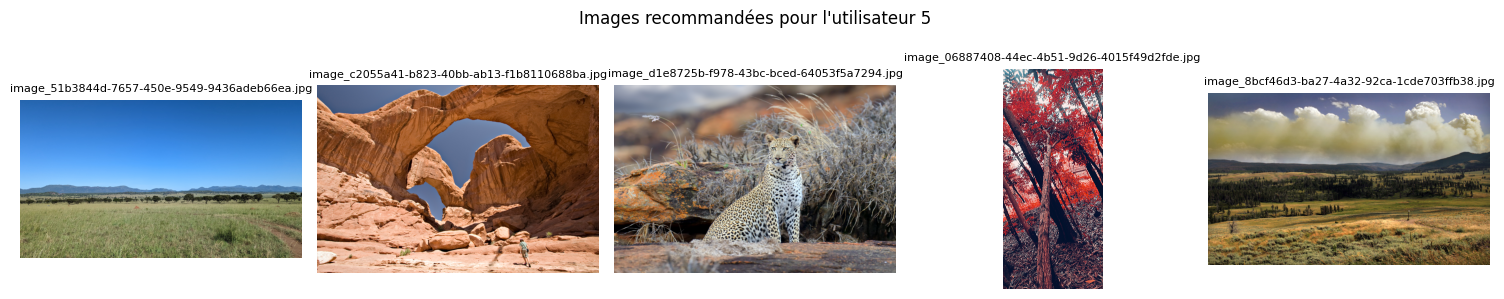

In [ ]:
import matplotlib.pyplot as plt
import cv2 
import os
import json

def show_recommended_images(image_folder="/data/images"):
    """Affiche les images recommandées pour un utilisateur."""
    with open("/data/recommandations.json", "r") as recommendations_file:
        recommendations = json.load(recommendations_file)
    
    if not recommendations:
        print("Aucune image recommandée.")
        return
    
    for user_id, image_list in recommendations.items():
        print(f"Utilisateur {user_id} :")
        fig, axes = plt.subplots(1, len(image_list), figsize=(3 * len(image_list), 3))
        if len(image_list) == 1:
            axes = [axes]

        for ax, image_name in zip(axes, image_list):
            image_path = os.path.join(image_folder, image_name)
            image = cv2.imread(image_path)
            if image is None:
                print(f"Image non trouvée : {image_path}")
                continue
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            ax.imshow(image)
            ax.axis("off")
            ax.set_title(image_name, fontsize=8)

        plt.suptitle(f"Images recommandées pour l'utilisateur {user_id}")
        plt.tight_layout()
        plt.show()

# Tester avec l'utilisateur 1
show_recommended_images()